In [39]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split

learning_rate=0.001
time=500
lamda=1

def get_data():
    data = load_svmlight_file("housing_scale.txt")
    return data[0], data[1]

X,y=get_data()
loss_trainhistory = []
loss_testhistory=[]


In [40]:
X=np.hstack([X.toarray(), np.ones((X.shape[0], 1))])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [41]:
w=np.random.random((1,14))
y_train=y_train.reshape(-1,1)

In [42]:
for i in range(time):
    loss_train=lamda/2*(np.linalg.norm(w,2)**2)+np.mean((y_train-X_train.dot(w.T))**2)
    loss_trainhistory.append(loss_train)
    loss_test=lamda/2*(np.linalg.norm(w,2)**2)+np.mean((y_test-X_test.dot(w.T))**2)
    loss_testhistory.append(loss_test)
    dw=-2*np.mean(X_train*(y_train-X_train.dot(w.T)),axis=0,keepdims = True)+lamda*w
    w=w-learning_rate*dw

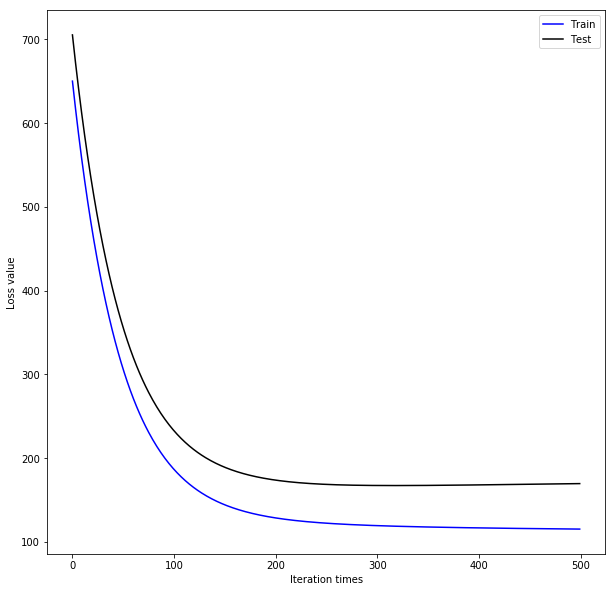

In [43]:
plt.plot(loss_trainhistory,'blue',label='Train')
plt.plot(loss_testhistory,'black',label='Test')
plt.xlabel('Iteration times')
plt.ylabel('Loss value')
plt.legend()
plt.show()